# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other features also impact productivity. Using both visualizations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?



In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df = pd.read_csv('Employee_productivity.csv')

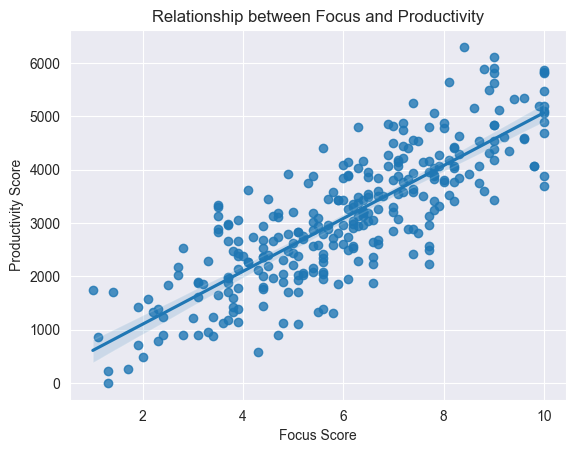

In [51]:
ax=sns.regplot(df, x='FocusScore', y='ProductivityScore')
ax.set(xlabel='Focus Score', ylabel='Productivity Score', title='Relationship between Focus and Productivity')
plt.show()


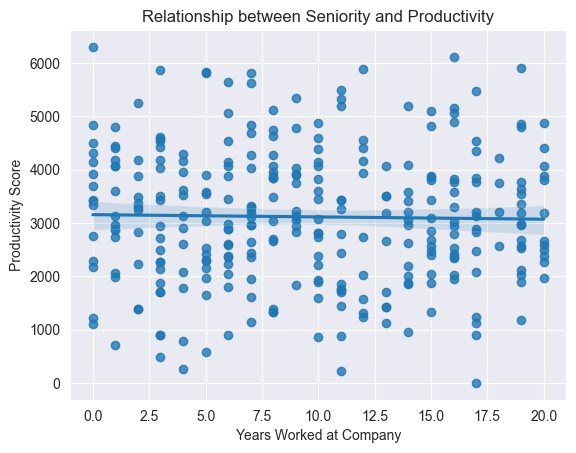

In [52]:
ax= sns.regplot(df, x='YearsAtCompany', y='ProductivityScore')
ax.set(xlabel='Years Worked at Company', ylabel='Productivity Score', title='Relationship between Tenure and Productivity')

plt.show()


In [ ]:
ax = sns.regplot(df, x='TeamMeetingsPerWeek', y='ProductivityScore')
ax.set(xlabel='Team Meetings per Week', ylabel='Productivity Score', title='Relationship Frequency of Meetings and Productivity')

plt.show()

[Text(0.5, 0, 'Years Spent Working at Company'),
 Text(0, 0.5, 'Focus Score'),
 Text(0.5, 1.0, 'Relationship between Tenure and Focus')]

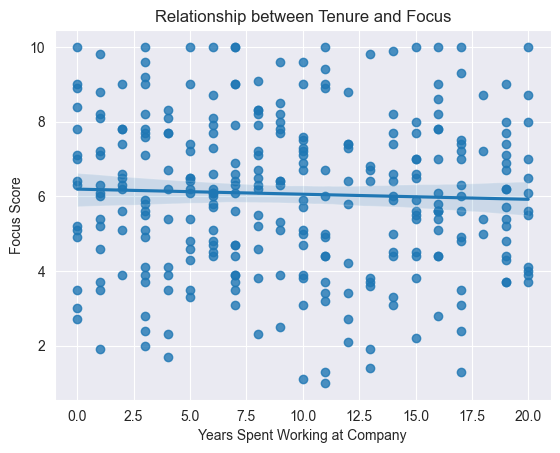

In [83]:
ax = sns.regplot(df, x='YearsAtCompany', y='FocusScore')

ax.set(xlabel='Years Spent Working at Company', ylabel='Focus Score', title='Relationship between Tenure and Focus')

In [ ]:
ax = sns.barplot(df, x='DeskLocation', y='ProductivityScore')

ax.set(xlabel='Focus Score', ylabel='Average Productivity Score', title='Relationship between Work Location and Productivity')
plt.show()

In [ ]:
ax = sns.barplot(df, x='DeskLocation', y='Average FocusScore')
ax.set(xlabel='Desk Location', ylabel='Focus Score', title='Relationship between Work Location and Focus')
plt.show()

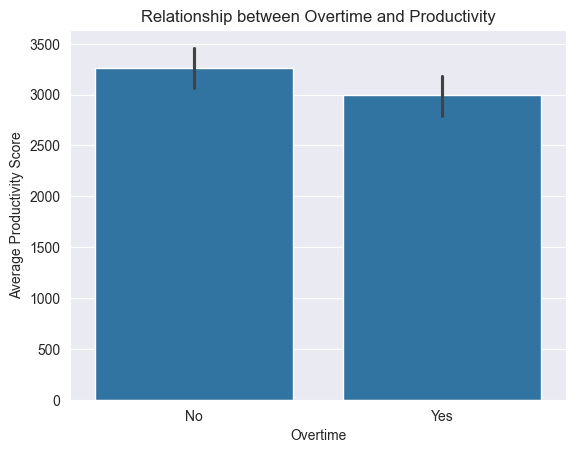

In [82]:
df.loc[df['HoursWorked'] <= 40, 'Overtime'] = False
df.loc[df['HoursWorked'] > 40, 'Overtime'] = True
df.head()
ax = sns.barplot(df, x='Overtime', y='ProductivityScore')
ax.set(xlabel='Overtime', ylabel='Average Productivity Score', title='Relationship between Overtime and Productivity', xticks=[0,1], xticklabels=['No', 'Yes'])
plt.show()

In [63]:
focus_prod_model = sm.OLS(df['ProductivityScore'], df['FocusScore']).fit()
tenure_prod_model = sm.OLS(df['ProductivityScore'], df['YearsAtCompany']).fit()
meetings_prod_model = sm.OLS(df['ProductivityScore'], df['TeamMeetingsPerWeek']).fit()

print(f'Focus/Productivity r²:\t\t{focus_prod_model.rsquared}')
print(f'Tenure/Productivity r²:\t\t{tenure_prod_model.rsquared}')
print(f'Meetings/Productivity r²:\t{meetings_prod_model.rsquared}')

Focus/Productivity r²:		0.9553678717059716
Tenure/Productivity r²:		0.6139440507350766
Meetings/Productivity r²:	0.574604025250683


Focus: From the graph we can see strong clustering towards the center line. The slope of the line is positive, indicating a strong, positive, linear relationship between the Focus Score and the Productivity Score. This is corroborated by our r² score, which tells us that roughly 95% of our focus-score data accounts for the productivity of the workers. Workers who are more focused are more likely to be more productive.

Tenure: From the graph we can see that the points have no central tendency, nor does the line have any inclination. We come away with the impression that there is no relationship between the employee's tenure and their productivity. Our r² suggests that our model accounts for 61% of the data. There is too much unexplained variance in this regression test to reliably indicate anything.

Meetings: The graph has many points which intercept and are very near to the line, but it has far too much spread. Additionally, the line has a negative inclination. Our r² value tell us that roughly 57% of the productivity is explained by the number of weekly meetings, suggesting a great amount of unexplained variance. We are left to conclude that one cannot reliably predict productivity in terms of weekly meetings, but on the whole, it does seem that the weekly meetings are detrimental to performance.

Of these features, 'FocusScore' was by far the most influential.

Addressing each point in turn:
1. New employees complained that more tenured employees were lazy and unproductive.
1. More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
1. Managers were worried that remote workers might be less productive.
1. In-person employees found it impossible to focus and be productive when their desk was in the open-plan area.
1. Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
1. Everyone complained that there were too many meetings.
----------------------------------------------------------------------------------------------------------------------------------------
1. In the graph 'Relationship between Tenure and Focus', much like in the graph 'Relationship between Tenure and Productivity', we see that our points are incredibly varied, and that our line is mostly flat. This implies that there is little relationship between tenure and focus, because there is too much unexplained variance. Furthermore, our line indicates a general decline in focus the longer the employee works for the company, though it is very minimal. The claim that newer employees cannot focus is not only unsubstantiated, but there is (weak) evidence that the opposite is true.
1. We have demonstrated that employee tenure is not a reliable indicator of productivity, for reasons explained above.
1. Our bar chart 'Relationship between Work Location and Productivity' indicates that, on average, remote workers are the most productive employees, refuting the claim that remote workers are less productive. The chart indicates little difference between productivity amongst remote workers and workers in private offices, but also indicates that employees in open-space offices are substantially less productive than the other two groups.
1. The bar chart 'Relationship between Work Location and Focus' indicates that on average, workers in the open-plan areas are substantially less focused than the other two groups. The data maps nearly 1:1 with the relationship between work location and productivity, supporting the idea that focus is the leading predictor of worker productivity.
1. Our bar chart 'Relationship between Overtime and Productivity' suggests that people who used overtime were, on average, less productive than workers who did not use overtime, suggesting the opposite of the claim. This may be explained by biases in the Productivity Score calculations, however.
1. Our regression graph suggests that more meetings can potentially negatively impact productivity, but there is not substantial evidence to support this one way or another.